In [1]:
import numpy as np

## matplotlib.pyplot 을 이용해 data를 visualize 하기

In [2]:
x = np.arange(1, 20, 2)
print(x.shape)
print(x)

def f(x) :
    return 2*x

y = f(x)
print(y.shape)
print(y)

(10,)
[ 1  3  5  7  9 11 13 15 17 19]
(10,)
[ 2  6 10 14 18 22 26 30 34 38]


matplotlib.pyplot 공식 document 웹페이지 : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

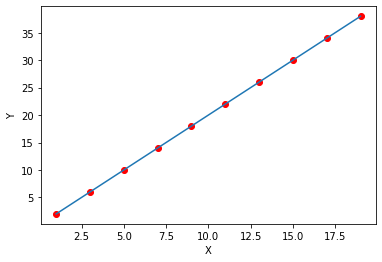

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color="red")
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show() 

# Exercise1

아래와 같은 그래프를 그려보세요

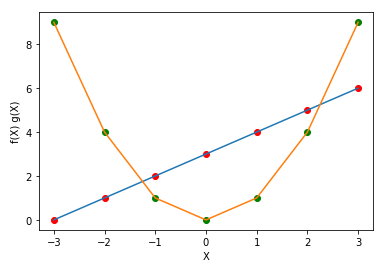

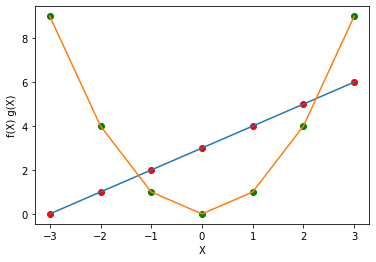

In [4]:
# Excercise1

x = np.arange(-3,4)
def f(x) :
    return x+3
def g(x) :
    return x**2

y1 = f(x)
y2 = g(x)

plt.scatter(x, y1, color="red")
plt.plot(x, y1)
plt.scatter(x, y2, color="green")
plt.plot(x, y2)
plt.xlabel('X')
plt.ylabel('f(X) g(X)')
plt.show()

# Data Preprocessing(sklearn, pandas)

In [5]:
from sklearn import datasets

house = datasets.load_boston()
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
x_data = house.data
y_data = house.target
print(x_data.shape, y_data.shape)   # (506, 13) (506,)

(506, 13) (506,)


In [7]:
import pandas as pd
df = pd.DataFrame(house.data, columns=house.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['target'] = y_data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


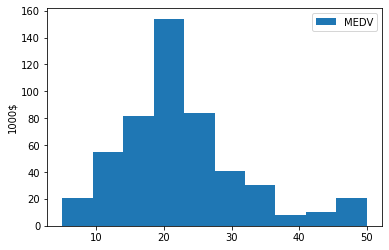

In [9]:
unit = 1000

plt.hist(df['target'])
plt.legend(['MEDV'])
plt.ylabel('{}$'.format(unit))
plt.show()

## Excercise2

아래와 같은 그래프를 그려보세요 (HINT : plt.hist 함수의 parameter에 bins 와 alpha를 추가해보세요)

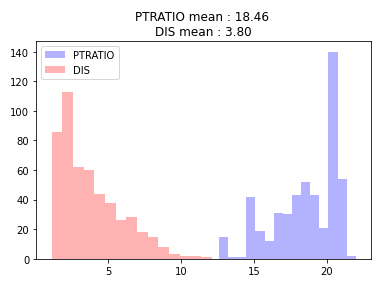

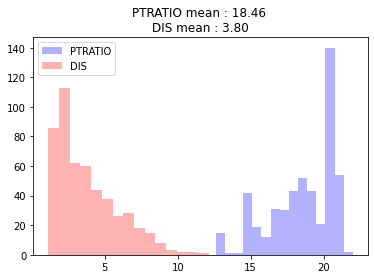

In [10]:
# Excercise2

plt.hist(df['PTRATIO'], bins = 15, alpha = 0.3, color = 'b')
plt.hist(df['DIS'], bins = 15, alpha = 0.3, color = 'r')
plt.legend(['PTRATIO', 'DIS'])
plt.title("PTRATIO mean : {:.2f} \nDIS mean : {:.2f}".format(df['PTRATIO'].mean(),df['DIS'].mean()))
plt.show()

## Data Preprocessing(Normalization, Standardization)

In [11]:
def func_minmaxscale (data):
    mx = x_data.max()
    mn = x_data.min()
    
    return (data-mn)/(mx-mn)

print(x_data[0:5,0])
func_minmaxscale(x_data[0:5,0])

[0.00632 0.02731 0.02729 0.03237 0.06905]


array([8.88888889e-06, 3.84106892e-05, 3.83825598e-05, 4.55274262e-05,
       9.71167370e-05])

sklearn document 웹페이지 : https://scikit-learn.org/stable/modules/classes.html  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
x_scaler.fit(x_data)
x_data_scaled = x_scaler.transform(x_data)
df_minmax = pd.DataFrame(x_data_scaled, columns=house.feature_names)
df_minmax['y'] = house.target
df_minmax.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
plt.hist(df_minmax['PTRATIO'], bins = 15, alpha = 0.3, color = 'b')
plt.hist(df_minmax['DIS'], bins = 15, alpha = 0.3, color = 'r')
plt.legend(['PTRATIO', 'DIS'])
plt.title("PTRATIO mean : {:.2f} \nDIS mean : {:.2f}".format(df_minmax['PTRATIO'].mean(),df_minmax['DIS'].mean()))
plt.show()

In [ ]:
def func_std(data):
    m = data.mean()
    s = data.std()

    return (data-m)/s

print(x_data_scaled[:5, 0])
print(func_std(x_data_scaled[:5, 0]))

## Excercise3

위의 func_std 와 같은 역할을 하는 StandardScaler를 활용하여 df_normalized 라는 DataFrame을 만들어 보세요.
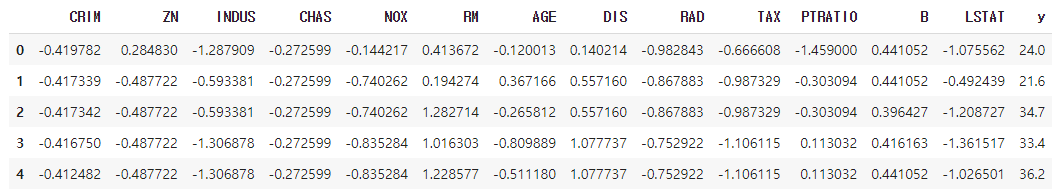

In [ ]:
# Excercise3

from sklearn.preprocessing import StandardScaler

x_normalize = StandardScaler()
x_data_normalized = x_normalize.fit_transform(x_data)

df_normalized = pd.DataFrame(x_data_normalized, columns=house.feature_names)
df_normalized['y'] = house.target
df_normalized.head()

## Standard Normal Distribution

In [ ]:
# Gaussian
mu = 3
sigma = 2

x = np.arange(-10, 10, 0.1)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))

plt.plot(x,y)
plt.show()

In [ ]:
import torch
mu = 0
sigma = 1
x = np.arange(-8, 8, 0.01)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
plt.plot(x, y, linestyle = ':', color = 'k')

t = torch.randn(1000)
plt.hist(t, bins = 20, density= True)
plt.show()

## Excercise4

아래와 같은 그래프를 그려보세요

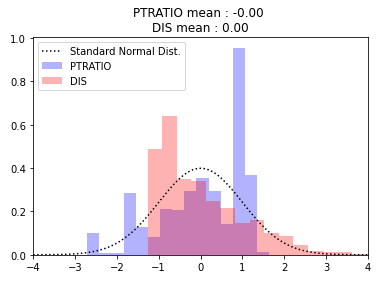

In [ ]:
#Solution

plt.hist(df_normalized['PTRATIO'], bins = 15, density = True, alpha = 0.3, color = 'b')
plt.hist(df_normalized['DIS'], bins = 15, density = True, alpha = 0.3, color = 'r')

mu = 0
sigma = 1
x = np.arange(-8, 8, 0.01)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
plt.plot(x, y, linestyle = ':', color = 'k')

plt.legend(['Standard Normal Dist.', 'PTRATIO', 'DIS'])
plt.title("PTRATIO mean : {:.2f} \nDIS mean : {:.2f}".format(df_normalized['PTRATIO'].mean(),df_normalized['DIS'].mean()))
plt.xlim([-4,4])
plt.show()